# Zimnat Insurance Recommendation  - Zindi 

### Business Need
For insurance markets to work well, insurance companies need to be able to pool and spread risk across a broad customer base. This works best where the population to be insured is diverse and large. In Africa, formal insurance against risk has been hampered by lack of private sector companies offering insurance, with no way to diversify and pool risk across populations.
Understanding the varied insurance needs of a population, and matching them to appropriate products offered by insurance companies, makes insurance more effective and makes insurance companies more successful.
At the heart of this, understanding the consumer of insurance products helps insurance companies refine, diversify, and market their product offerings. Increased data collection and improved data science tools offer the chance to greatly improve this understanding.
In this competition, you will leverage data and ML methods to improve market outcomes for insurance provider Zimnat, by matching consumer needs with product offerings in the Zimbabwean insurance market. Zimnat wants an ML model to use customer data to predict which kinds of insurance products to recommend to customers

###   Below is the Variable description of the train dataset
| variable         | description |
| ---------------- | ------------|
| `ID`                               | unique user id. |
| `join_date`                        | date the joined zimnat. |
| `sex`                              | sex of the client. |
| `marital_statu`                    | married status of the client. |
| `birth_year`                       | year client was born in. |
| `ranch_code`                       | branch where client signed up. |
| `occupation_code`                  | a code that describes what the client does. |
| `occupation_category_code`         | the category the clients job falls under. |
| `P5DA`                             | product code. |
| `RIBP`                             | product code. |
| `8NN1`                             | product code. |
| `7POT`                             | product code. |
| `66FJ`                             | product code. |
| `GYSR`                             | product code. |
| `SOP4`                             | product code. |
| `RVSZ`                             | product code. |
| `PYUQ`                             | product code. |
| `LJR9`                             | product code. |
| `N2MW`                             | product code. |
| `AHXO`                             | product code. |
| `BSTQ`                             | product code. |
| `FM3X`                             | product code. |
| `K6QO`                             | product code. |
| `QBOL`                             | product code. |
| `JWFN`                             | product code. |
| `JZ9D`                             | product code. |
| `J9JW`                             | product code. |
| `GHYX`                             | product code. |
| `ECY3`                             | product code. |

### Importing the necessary libraries

In [3]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# os
import os

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Data importation

In [4]:
# Setting the data path.
data_path = os.path.join(os.path.pardir,"data","raw")
train_file_path = os.path.join(data_path,"train.csv")
test_file_path = os.path.join(data_path,"test.csv")
submission_file_path = os.path.join(data_path,"SampleSubmission.csv")

In [5]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
sample_submission = pd.read_csv(submission_file_path)

### Data Understanding
Let's now have a glimpse of the data.

In [6]:
# Getting the summary of the train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [11]:
# Getting the summary of the test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        10000 non-null  object
 1   join_date                 9999 non-null   object
 2   sex                       10000 non-null  object
 3   marital_status            10000 non-null  object
 4   birth_year                10000 non-null  int64 
 5   branch_code               10000 non-null  object
 6   occupation_code           10000 non-null  object
 7   occupation_category_code  10000 non-null  object
 8   P5DA                      10000 non-null  int64 
 9   RIBP                      10000 non-null  int64 
 10  8NN1                      10000 non-null  int64 
 11  7POT                      10000 non-null  int64 
 12  66FJ                      10000 non-null  int64 
 13  GYSR                      10000 non-null  int64 
 14  SOP4                   

In [7]:
# print shape
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (29132, 29)
test data shape : (10000, 29)


In [8]:
# Checking the structure; train_data
train_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [9]:
# Checking the structure; test_data
test_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
class Information:
    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")
    
    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)

        #Returning missing values
        return missing_values
    
    def _get_unique_values(self,data):
        #Getting unique alues for each feature
        unique_values = data.nunique()
        #Sorting the values
        unique_values.sort_values(ascending=False, inplace=True)
        
        #Returning unique values values
        return unique_values

In [16]:
# Calling the function Information()
data_info = Information()
# Getting the unique values for the columns in train_data
data_info._get_unique_values(train_data)

Information object created


ID                          29132
occupation_code               233
join_date                     132
birth_year                     61
branch_code                    15
marital_status                  8
occupation_category_code        6
GYSR                            2
sex                             2
P5DA                            2
RIBP                            2
8NN1                            2
7POT                            2
66FJ                            2
ECY3                            2
GHYX                            2
RVSZ                            2
PYUQ                            2
LJR9                            2
N2MW                            2
AHXO                            2
BSTQ                            2
FM3X                            2
K6QO                            2
QBOL                            2
JWFN                            2
JZ9D                            2
J9JW                            2
SOP4                            2
dtype: int64

In [17]:
# Getting the missing values for the columns in train_data
data_info._get_missing_values(train_data)

join_date                   2
ECY3                        0
GYSR                        0
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
SOP4                        0
GHYX                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
ID                          0
dtype: int64

In [18]:
# Getting the missing values for the columns in train_data
data_info._get_missing_values(test_data)

join_date                   1
ECY3                        0
GYSR                        0
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
SOP4                        0
GHYX                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
ID                          0
dtype: int64

In [7]:
# Summary of the numerical columns
train_data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,29132.0,1979.517060,9.325604,1932.0,1973.0,1980.0,1987.0,2011.0
P5DA,29132.0,0.001373,0.037030,0.0,0.0,0.0,0.0,1.0
RIBP,29132.0,0.061101,0.239520,0.0,0.0,0.0,0.0,1.0
8NN1,29132.0,0.005389,0.073215,0.0,0.0,0.0,0.0,1.0
7POT,29132.0,0.010847,0.103585,0.0,0.0,0.0,0.0,1.0
66FJ,29132.0,0.011637,0.107246,0.0,0.0,0.0,0.0,1.0
GYSR,29132.0,0.000137,0.011717,0.0,0.0,0.0,0.0,1.0
SOP4,29132.0,0.014795,0.120733,0.0,0.0,0.0,0.0,1.0
RVSZ,29132.0,0.869422,0.336944,0.0,1.0,1.0,1.0,1.0
PYUQ,29132.0,0.074592,0.262736,0.0,0.0,0.0,0.0,1.0


In [9]:
train_data.columns

Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

### Univariate Analyasis

In [8]:
# A function that plots for us the bar plots.
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

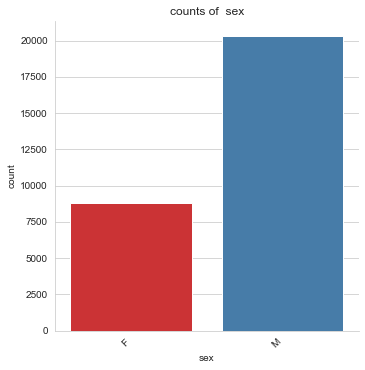

In [10]:
# A bar plot for the gender clients.
catplot("sex",data = train_data)

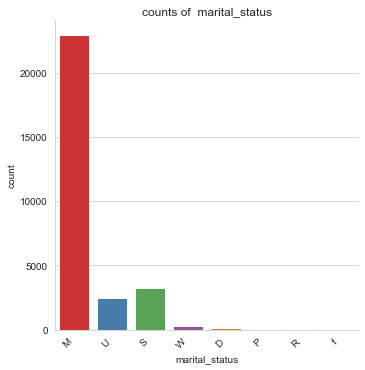

In [11]:
# A bar plot for the client's marital status.
catplot("marital_status",data = train_data)

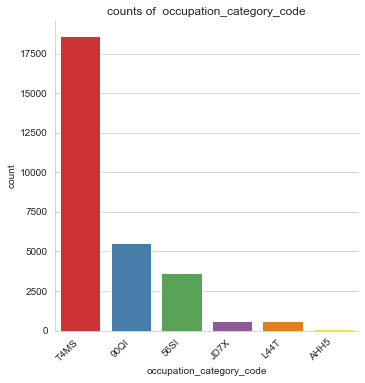

In [12]:
# A bar plot for the client's job category.
catplot("occupation_category_code",data = train_data)